In [759]:
# import all the libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import scale
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [760]:
# import warning to ignore all unnecessarily warnings

import warnings as w
w.filterwarnings('ignore')


In [761]:
# Defining a small function to get Accuracy, Specificity, Precision, Recall:
def accuracy_precision(cm):
    X1,X2,X3,X4,X5,X6,X7,X8,X9 = cm.ravel()
    accuracy=(X1+X5+X9)/cm.sum()
    specificity=(X5+X6+X8+X9)/(X4+X5+X6+X7+X8+X9)
    precision=X1/(X1+X4+X7)
    recall=X1/(X1+X2+X3)
    print("Accuracy: %s" %accuracy)
    print("Specificity: %s" %specificity)
    print("Precision: %s" %precision)
    print("Recall: %s" %recall)

In [762]:
# read excel file using pandas Read function:
emp_data = pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")
emp_data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
5,E1001011,27,Male,Life Sciences,Divorced,Development,Developer,Travel_Frequently,10,2,...,3,9,4,2,9,7,1,7,No,4
6,E1001016,50,Male,Marketing,Married,Sales,Sales Representative,Travel_Rarely,8,4,...,4,4,2,3,2,2,2,2,No,3
7,E1001019,28,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,2,...,4,10,4,3,7,7,3,7,Yes,3
8,E1001020,36,Female,Life Sciences,Married,Development,Developer,Non-Travel,8,3,...,1,10,2,3,8,7,0,5,No,3
9,E1001021,38,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,3,...,4,10,4,4,1,0,0,0,No,3


# EDA - Exploratory Data Analysis........

#### Plotting a histogram graph to get the proper idea about data distribution...

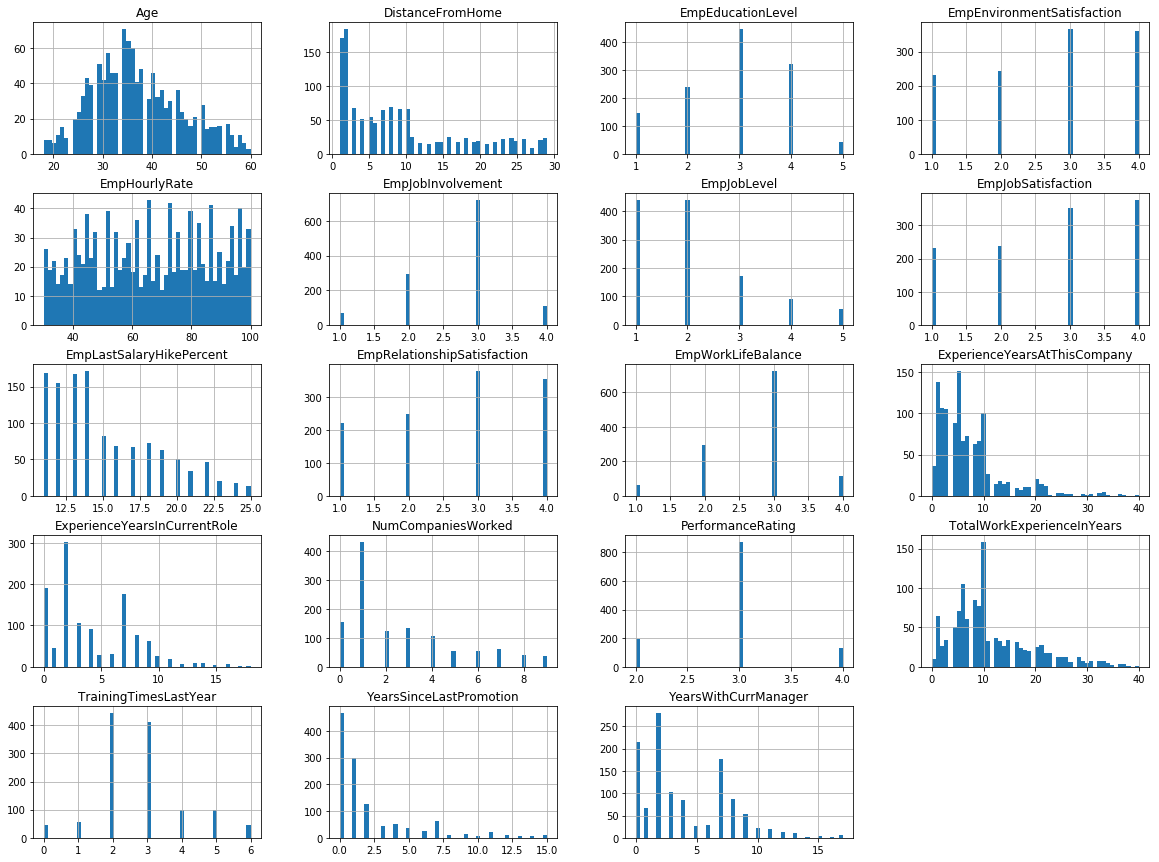

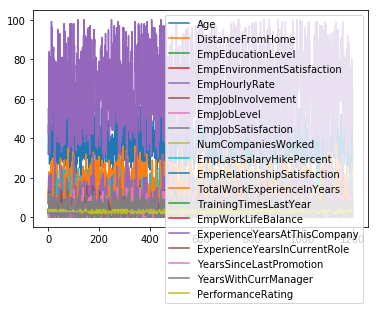

In [763]:
%matplotlib inline
emp_data.hist(bins=50, figsize=(20,15))
emp_data.plot()

In [764]:
# To get the columns name from the dataset:
emp_data.columns.tolist()

['EmpNumber',
 'Age',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'OverTime',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Attrition',
 'PerformanceRating']

In [765]:
# Checking the shape of the dataset:
emp_data.shape

(1200, 28)

In [766]:
# categorical counting of performanceRating column:
Counter(emp_data.PerformanceRating)

Counter({3: 874, 4: 132, 2: 194})

In [767]:
# categorical counting of EmpDepartment column:
Counter(emp_data.EmpDepartment)

Counter({'Sales': 373,
         'Human Resources': 54,
         'Development': 361,
         'Data Science': 20,
         'Research & Development': 343,
         'Finance': 49})

In [768]:
# Checking whether any null values are there or not...
emp_data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

#### Adding one new column to the dataset and column name is Performance:

In [769]:
emp_data['Performance'] = 'test'
emp_data.head(3)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,Performance
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,10,2,2,10,7,0,8,No,3,test
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,20,2,3,7,7,1,7,No,3,test
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,20,2,3,18,13,1,12,No,4,test


#### Assigning performance remarks as per PerformanceRating...

In [770]:
emp_data.loc[(emp_data.PerformanceRating==2),'Performance'] = 'Good'
emp_data.loc[(emp_data.PerformanceRating==3),'Performance'] = 'Excellent'
emp_data.loc[(emp_data.PerformanceRating==4) ,'Performance'] = 'Outstanding'
emp_data.head(3)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,Performance
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,10,2,2,10,7,0,8,No,3,Excellent
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,20,2,3,7,7,1,7,No,3,Excellent
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,20,2,3,18,13,1,12,No,4,Outstanding


##### Droping columns which is not helpful for data analysis using Drop function..

In [771]:
emp_data.drop(['EmpNumber'],axis=1,inplace=True)
emp_data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,Performance
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,10,2,2,10,7,0,8,No,3,Excellent
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,20,2,3,7,7,1,7,No,3,Excellent
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,20,2,3,18,13,1,12,No,4,Outstanding
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,23,2,2,21,6,12,6,No,3,Excellent
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,10,1,3,2,2,2,2,No,3,Excellent


##### Getting all information about dataset using info function...

In [772]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
EmpLastSalaryHikePercent        1200 non-null int64
Em

In [773]:
emp_data.columns.tolist()

['Age',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'OverTime',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Attrition',
 'PerformanceRating',
 'Performance']

##### Applying LabelEncoder for leveling the data i.e converting object into integer...

In [774]:
enc = LabelEncoder()
emp_data.Gender = enc.fit_transform(emp_data.Gender)
emp_data.EducationBackground = enc.fit_transform(emp_data.EducationBackground)
emp_data.MaritalStatus = enc.fit_transform(emp_data.MaritalStatus)
emp_data.EmpDepartment = enc.fit_transform(emp_data.EmpDepartment)
emp_data.EmpJobRole = enc.fit_transform(emp_data.EmpJobRole)
emp_data.BusinessTravelFrequency = enc.fit_transform(emp_data.BusinessTravelFrequency)
emp_data.OverTime = enc.fit_transform(emp_data.OverTime)
emp_data.Attrition = enc.fit_transform(emp_data.Attrition)

In [775]:
emp_data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,Performance
0,32,1,2,2,5,13,2,10,3,4,...,10,2,2,10,7,0,8,0,3,Excellent
1,47,1,2,2,5,13,2,14,4,4,...,20,2,3,7,7,1,7,0,3,Excellent
2,40,1,1,1,5,13,1,5,4,4,...,20,2,3,18,13,1,12,0,4,Outstanding
3,41,1,0,0,3,8,2,10,4,2,...,23,2,2,21,6,12,6,0,3,Excellent
4,60,1,2,2,5,13,2,16,4,1,...,10,1,3,2,2,2,2,0,3,Excellent


In [776]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
Age                             1200 non-null int64
Gender                          1200 non-null int64
EducationBackground             1200 non-null int64
MaritalStatus                   1200 non-null int64
EmpDepartment                   1200 non-null int64
EmpJobRole                      1200 non-null int64
BusinessTravelFrequency         1200 non-null int64
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null int64
EmpLastSalaryHikePercent        1200 non-null int64
EmpRelati

In [777]:
# Finding correlation between predictor variables and target variable:
emp_data.corr()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
Age,1.000000,-0.040107,-0.055905,-0.098368,-0.000104,-0.037665,0.040579,0.020937,0.207313,0.013814,...,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.189317,-0.040164
Gender,-0.040107,1.000000,0.009922,-0.042169,-0.010925,0.011332,-0.043608,-0.001507,-0.022960,0.000033,...,0.030707,-0.061055,-0.057654,0.015793,-0.030392,-0.031823,-0.021575,-0.036643,0.035758,-0.001780
EducationBackground,-0.055905,0.009922,1.000000,-0.001097,-0.026874,-0.012325,0.012382,-0.013919,-0.047978,0.045028,...,0.005652,-0.027929,0.051596,0.022890,-0.009887,-0.003215,0.014277,0.002767,0.027161,0.005607
MaritalStatus,-0.098368,-0.042169,-0.001097,1.000000,0.067272,0.038023,0.028520,-0.019148,0.026737,-0.032467,...,0.026410,-0.093537,0.026045,0.014154,-0.075728,-0.076663,-0.052951,-0.061908,0.162969,0.024172
EmpDepartment,-0.000104,-0.010925,-0.026874,0.067272,1.000000,0.568973,-0.045233,0.007707,0.019175,-0.019237,...,-0.050286,0.016065,0.016438,0.068875,0.047677,0.069602,0.052315,0.033850,0.048006,-0.162615
EmpJobRole,-0.037665,0.011332,-0.012325,0.038023,0.568973,1.000000,-0.086251,0.022939,-0.016792,0.044612,...,-0.043067,-0.049529,0.004452,-0.007519,-0.009047,0.019383,0.012190,-0.004504,0.037508,-0.096209
BusinessTravelFrequency,0.040579,-0.043608,0.012382,0.028520,-0.045233,-0.086251,1.000000,-0.020935,0.002064,0.012267,...,-0.032705,0.042736,0.006720,-0.040969,-0.015029,-0.006541,-0.020824,-0.028073,0.007217,-0.031025
DistanceFromHome,0.020937,-0.001507,-0.013919,-0.019148,0.007707,0.022939,-0.020935,1.000000,0.045856,-0.017719,...,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,0.063248,-0.046142
EmpEducationLevel,0.207313,-0.022960,-0.047978,0.026737,0.019175,-0.016792,0.002064,0.045856,1.000000,-0.037103,...,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,-0.049118,0.020529
EmpEnvironmentSatisfaction,0.013814,0.000033,0.045028,-0.032467,-0.019237,0.044612,0.012267,-0.017719,-0.037103,1.000000,...,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,-0.123490,0.395561


### Visual representation of correlation...

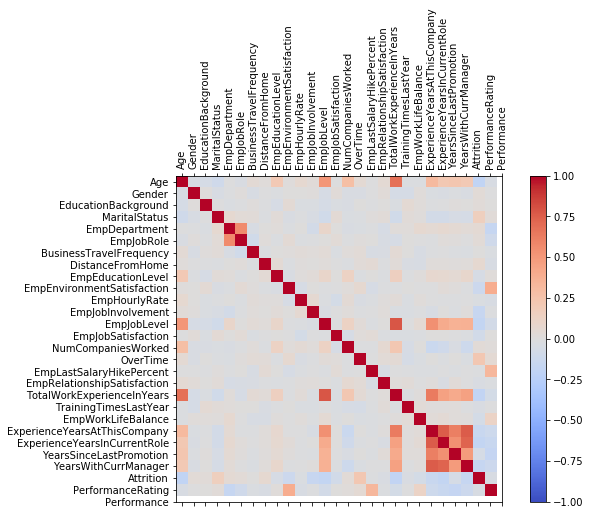

In [778]:
rcParams['figure.figsize'] = 10,6
corr = emp_data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(emp_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(emp_data.columns)
ax.set_yticklabels(emp_data.columns)
plt.show()

#### Dataset has null values. So NAN values are filled by mean values....

In [779]:
emp_data = emp_data.fillna(emp_data.mean())

## Taking predictor variable and target variable as X,Y... 

In [780]:
X = emp_data.loc[:,['EmpDepartment','EmpEnvironmentSatisfaction','EmpWorkLifeBalance','EmpLastSalaryHikePercent','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion']]
y = emp_data.iloc[:,-1]

#### Splitting the dataset into training and testing sets......

In [781]:
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size = 0.3,random_state=13)

# Modelling the Training set:

### Random Forest Classifier:

In [782]:
rf_model =  RandomForestClassifier(n_estimators=70,random_state=7,max_depth=5,min_samples_leaf=1,max_leaf_nodes=13)
rf_model.fit(X_train,y_train)
predictions = rf_model.predict(X_test)
print("The accuracy_score is:",round(accuracy_score(y_test,predictions),2)*100,'%')

The accuracy_score is: 93.0 %


#### Showing the confusion matrix....

In [783]:
pd.crosstab(y_test, predictions)

col_0,Excellent,Good,Outstanding
Performance,,,
Excellent,252,6,1
Good,9,50,0
Outstanding,7,1,34


#### Calculating the accuracy of the test set...

In [784]:
cm_test=confusion_matrix(y_test,predictions)
accuracy_precision(cm_test)

Accuracy: 0.9333333333333333
Specificity: 0.8415841584158416
Precision: 0.9402985074626866
Recall: 0.972972972972973


# XGBoost Classifier:

In [952]:
# model_XG = XGBClassifier(random_state=10,n_estimators=50,reg_lambda=7)
# model_XG.fit(X_train,y_train)
# y_predict_XG = model_XG.predict(X_test)
# print("The accuracy_score is:",round(accuracy_score(y_test,y_predict_XG),2)*100,'%')
#pd.crosstab(y_test,y_predict_XG)
#cm_test=confusion_matrix(y_test,y_predict_XG)
#accuracy_precision(cm_test)

# PCA(Principle Component Analysis) technique:

### In this dataset predictors are more. So PCA technique is used for reducing the dimension.

In [788]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

In [789]:
pca.explained_variance_ratio_

array([0.65200884, 0.16425998, 0.07145125, 0.05576326, 0.03568042,
       0.01477481, 0.00606144])

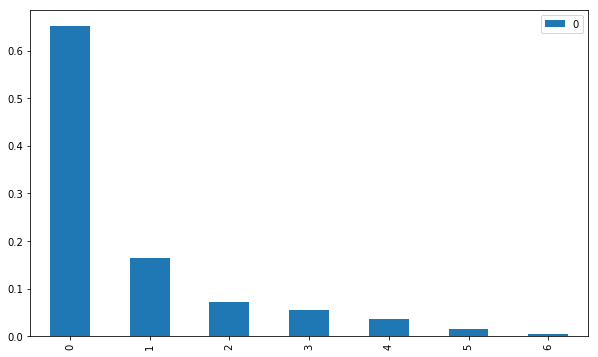

In [790]:
p_df = pd.DataFrame(pca.explained_variance_ratio_)
p_df.plot(kind='bar')

In [791]:
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[2]+pca.explained_variance_ratio_[3]+pca.explained_variance_ratio_[4]+pca.explained_variance_ratio_[5]+pca.explained_variance_ratio_[6]


1.0000000000000002

In [792]:
X = X_pca[:,0:6]
X.shape

(1200, 6)

In [793]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

# Modelling the Training set after using PCA:

## XGBoost Classifier with PCA:

In [794]:
# model_XG_pca = XGBClassifier(random_state=3,n_estimators=35,n_jobs=3)
# model_XG_pca.fit(X_train,y_train)
# y_predict_XG_pca = model_XG_pca.predict(X_test)
# print("The accuracy_score is:",round(accuracy_score(y_test,y_predict_XG_pca),2)*100,'%')
#pd.crosstab(y_test,y_predict_XG_pca)
#cm_test=confusion_matrix(y_test,y_predict_XG_pca)
#accuracy_precision(cm_test)

The accuracy_score is: 91.0 %


# RandomForest Classifier with PCA:

In [953]:
rf_model_pca =  RandomForestClassifier(n_estimators=40,random_state=12,max_depth=9)
rf_model_pca.fit(X_train,y_train)
y_predictions_pca = rf_model_pca.predict(X_test)
print("The accuracy_score is:",round(accuracy_score(y_test, y_predictions_pca),2)*100,'%')

The accuracy_score is: 86.0 %


In [798]:
pd.crosstab(y_test, y_predictions_pca)

col_0,Excellent,Good,Outstanding
Performance,,,
Excellent,177,6,2
Good,10,27,0
Outstanding,2,1,15


In [799]:
cm_test=confusion_matrix(y_test,y_predictions_pca)
accuracy_precision(cm_test)

Accuracy: 0.9125
Specificity: 0.7818181818181819
Precision: 0.9365079365079365
Recall: 0.9567567567567568


# Department Wise Performances Analysis:

In [800]:
emp_data['EmpDepartment'].value_counts()

5    373
1    361
4    343
3     54
2     49
0     20
Name: EmpDepartment, dtype: int64

In [801]:
dept_data = emp_data['EmpDepartment']
per_data = emp_data['PerformanceRating']

In [802]:
dept_data = pd.DataFrame(dept_data)
per_data = pd.DataFrame(per_data)

In [803]:
dept_data = pd.get_dummies(dept_data['EmpDepartment'])
dept_data = pd.concat([dept_data,per_data],axis=1)

In [804]:
dept_data.columns = ['Sales','Development','Research & Development','Human Resources','Finance','Data Science','PerformanceRating']
dept_data.head()

,Sales,Development,Research & Development,Human Resources,Finance,Data Science,PerformanceRating
0,0,0,0,0,0,1,3
1,0,0,0,0,0,1,3
2,0,0,0,0,0,1,4
3,0,0,0,1,0,0,3
4,0,0,0,0,0,1,3


### Ploting graph to show the performance according to department:

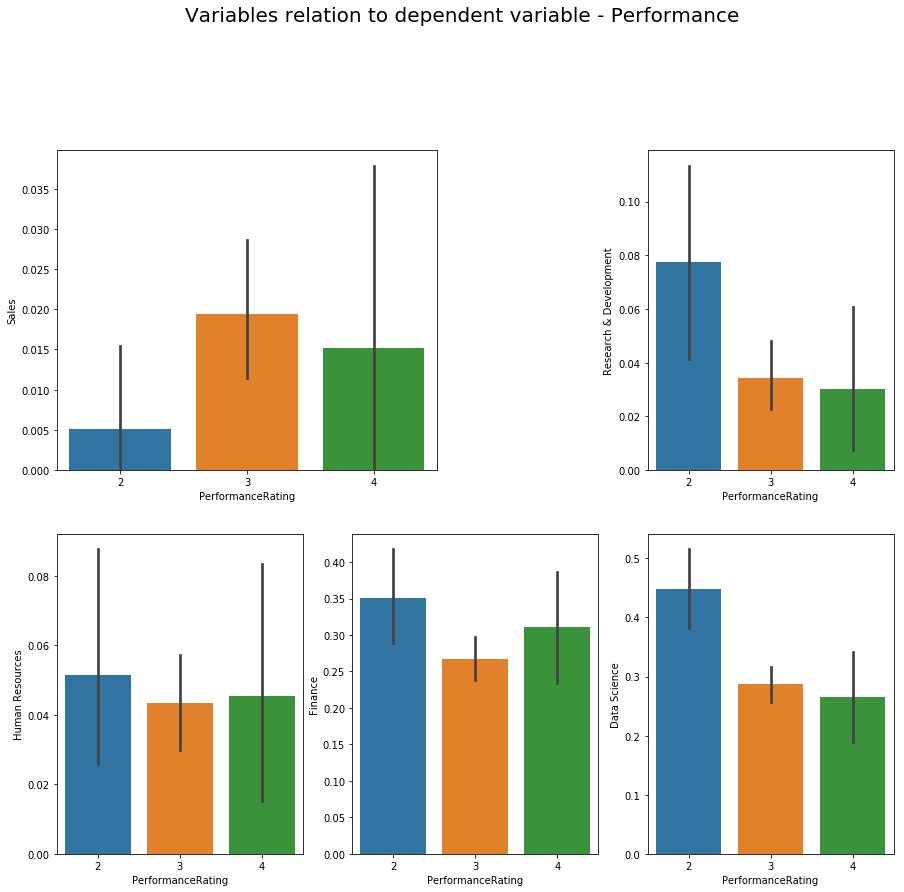

In [805]:
plt.figure(figsize = (15,20))
plt.subplot(3,2,1)
sb.barplot(dept_data['PerformanceRating'], dept_data['Sales'])
plt.subplot(3,2,2)
sb.barplot(dept_data['PerformanceRating'], dept_data['Development'])
plt.subplot(3,3,3)
sb.barplot(dept_data['PerformanceRating'], dept_data['Research & Development'])
plt.subplot(3,3,4)
sb.barplot(dept_data['PerformanceRating'], dept_data['Human Resources'])
plt.subplot(3,3,5)
sb.barplot(dept_data['PerformanceRating'], dept_data['Finance'])
plt.subplot(3,3,6)
sb.barplot(dept_data['PerformanceRating'], dept_data['Data Science'])

plt.suptitle("Variables relation to dependent variable - Performance", fontsize = 20)
plt.show()

# Top 3 Important Factors Effecting Employee Performance:

In [947]:
X = emp_data.loc[:,['EmpEnvironmentSatisfaction','EmpLastSalaryHikePercent','YearsSinceLastPromotion']]
y = emp_data.iloc[:,-1] 

In [948]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

### Random Forest Classifier:

In [949]:
rf_model =  RandomForestClassifier(n_estimators=70,random_state=7,max_depth=5,min_samples_leaf=1,max_leaf_nodes=13)
rf_model.fit(X_train,y_train)
predictions = rf_model.predict(X_test)
print("The accuracy_score is:",round(accuracy_score(y_test,predictions),2)*100,'%')

The accuracy_score is: 90.0 %


In [950]:
pd.crosstab(y_test, predictions)

col_0,Excellent,Good,Outstanding
Performance,,,
Excellent,172,12,1
Good,6,31,0
Outstanding,4,0,14


In [951]:
cm_test=confusion_matrix(y_test,predictions)
accuracy_precision(cm_test)

Accuracy: 0.9041666666666667
Specificity: 0.8181818181818182
Precision: 0.945054945054945
Recall: 0.9297297297297298


# Making The Prediction File Using Random Forest Classifier

In [955]:
from sklearn.externals import joblib
joblib.dump(rf_model,'Predict.ml')

['Predict.ml']